In [2]:
import time
from datetime import timedelta
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.subplots(figsize=(20,20))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
df = pd.read_csv('C:\\Users\Eric\Desktop\crash_data_one_hot_encoded_MLP.csv')
df.fillna(0,inplace=True)
encode = LabelEncoder()

#df['crash_code'] = encode.fit_transform(df['CRASH_SEVERITY'])
df_non_injury = df[df.CRASH_SEV_CODE==2]  # 480452 samples
df_minor = df[df.CRASH_SEV_CODE==1]       # 150834 samples
df_serious = df[df.CRASH_SEV_CODE==3]     # 37347  samples
df_fatal = df[df.CRASH_SEV_CODE==0]       # 6178   samples

df_minor_upsampled = resample(df_minor, replace=True,n_samples=480452,random_state=40)
df_serious_upsampled = resample(df_serious, replace=True,n_samples=480452,random_state=40)
df_fatal_upsampled = resample(df_fatal, replace=True,n_samples=480452,random_state=40)

df_upsampled = pd.concat([df_non_injury, df_minor_upsampled, df_serious_upsampled, df_fatal_upsampled])

df_upsampled.CRASH_SEV_CODE.value_counts()






3    480452
2    480452
1    480452
0    480452
Name: CRASH_SEV_CODE, dtype: int64

In [3]:
features = ['CRASH_YEAR', 'NUM_LANES', 'SPD_LIM', 'MULTI_VEH_CODE','HOLIDAY_CODE',
            'LG_REGION_DESC_CODE', 'JUNCTION_TYPE_CODE', 'DIRN_ROLE1_DESC_CODE','INTSN_MIDBLOCK_CODE',
            'FLAT_HILL_CODE','ROAD_CURVATURE_CODE','ROAD_MARKINGS_CODE','ROAD_SURFACE_CODE','ROAD_WET_CODE',
            'URBAN_CODE','LIGHT_CODE','STREET_LIGHT_CODE','WEATHER_A_CODE']


X = df.drop("CRASH_SEV_CODE", axis=1).values
y = df["CRASH_SEV_CODE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape); print(X_test.shape)



(607329, 92)
(67482, 92)


In [4]:

clf = LinearSVC(random_state=40, tol=1e-5,verbose=True, max_iter = 10000)

start = time.time()
clf.fit(X_train,y_train)
stop = time.time()

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f"\n Training time: ")
print(str(timedelta(seconds=(stop - start))))
print("\n training data\n")
print(confusion_matrix(y_train,predict_train))
print("\n")
print(classification_report(y_train,predict_train,labels=pd.unique(predict_train)))
print("\n---------------------------------------------------------------------------------------\n")
print("\n test data\n")
print(confusion_matrix(y_test,predict_test))
print("\n")
print(classification_report(y_test,predict_test,labels=pd.unique(predict_test)))

[LibLinear]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Training time: 
3:19:40.212605

 training data

[[     0    837   4725      0]
 [     0  22181 113520      0]
 [     0   5701 426768      0]
 [     0   7138  26459      0]]


              precision    recall  f1-score   support

           2       0.75      0.99      0.85    432469
           1       0.62      0.16      0.26    135701

   micro avg       0.74      0.79      0.76    568170
   macro avg       0.68      0.58      0.55    568170
weighted avg       0.72      0.79      0.71    568170


---------------------------------------------------------------------------------------


 test data

[[    0    86   530     0]
 [    0  2424 12709     0]
 [    0   645 47338     0]
 [    0   795  2955     0]]


              precision    recall  f1-score   support

           2       0.75      0.99      0.85     47983
           1       0.61      0.16      0.25     15133

   micro avg       0.74      0.79      0.76     63116
   macro avg       0.68      0.57      0.55     63116
weighted a

In [5]:
print(classification_report(y_test,predict_test,labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.61      0.16      0.25     15133
           2       0.75      0.99      0.85     47983
           3       0.00      0.00      0.00      3750

    accuracy                           0.74     67482
   macro avg       0.34      0.29      0.28     67482
weighted avg       0.67      0.74      0.66     67482



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



clf = LinearSVC(random_state=40, tol=1e-5,verbose=True, max_iter = 10000)

start = time.time()
clf.fit(X_train,y_train)
stop = time.time()

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f"\n Training time: ")
print(str(timedelta(seconds=(stop - start))))
print("\n training data\n")
print(confusion_matrix(y_train,predict_train))
print("\n")
print(classification_report(y_train,predict_train,labels=pd.unique(predict_train)))
print("\n---------------------------------------------------------------------------------------\n")
print("\n test data\n")
print(confusion_matrix(y_test,predict_test))
print("\n")
print(classification_report(y_test,predict_test,labels=pd.unique(predict_test)))

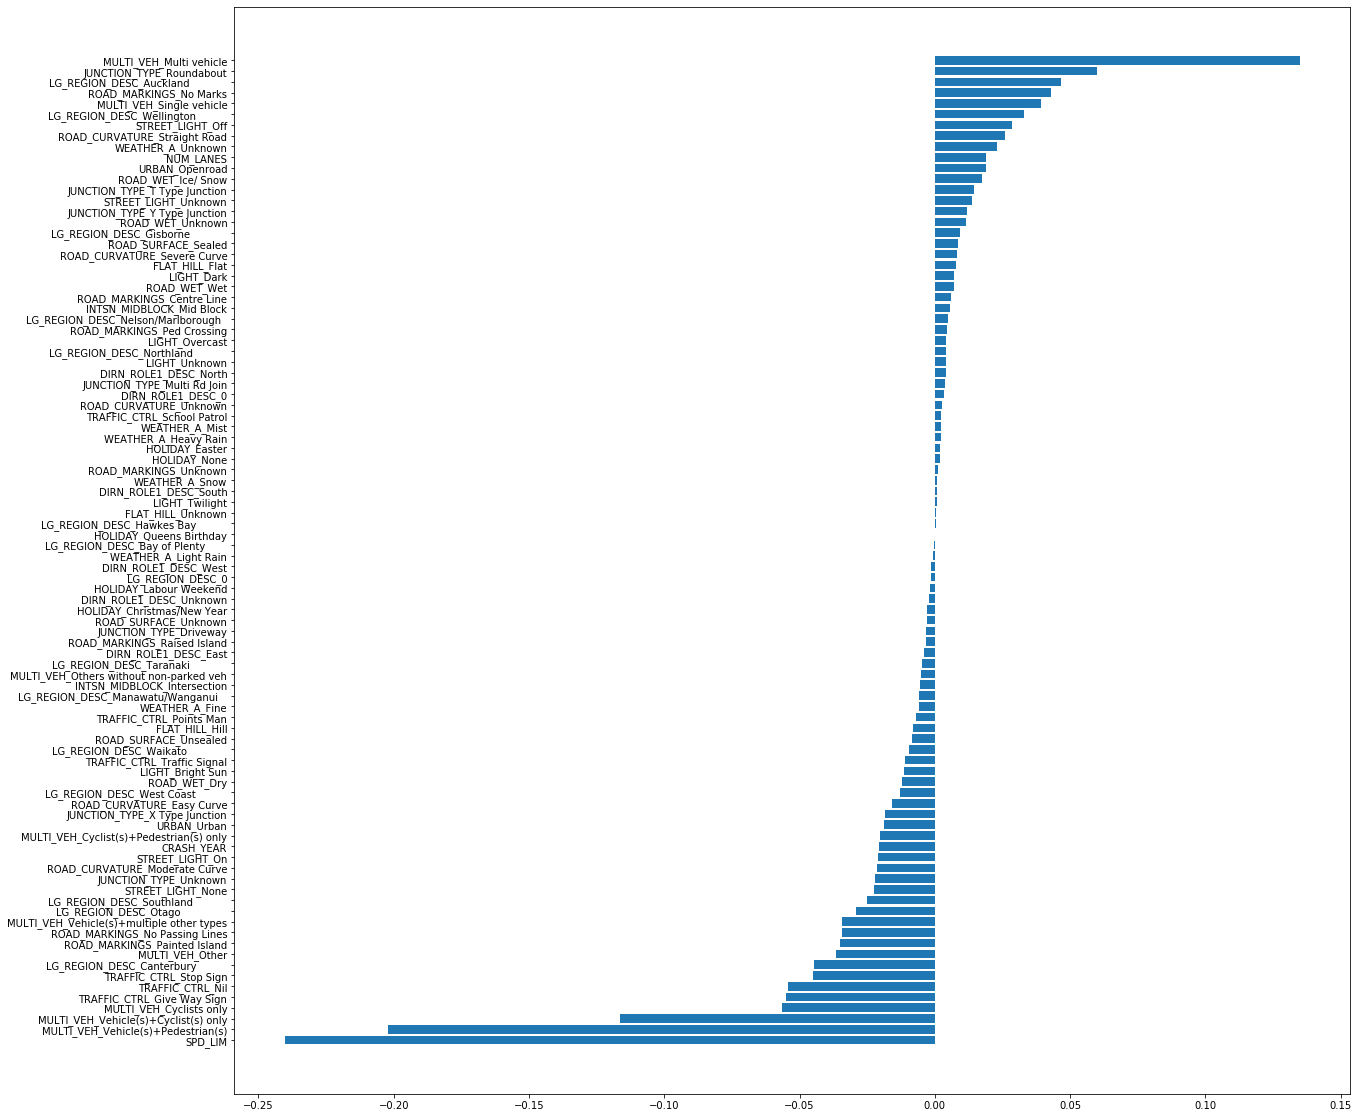

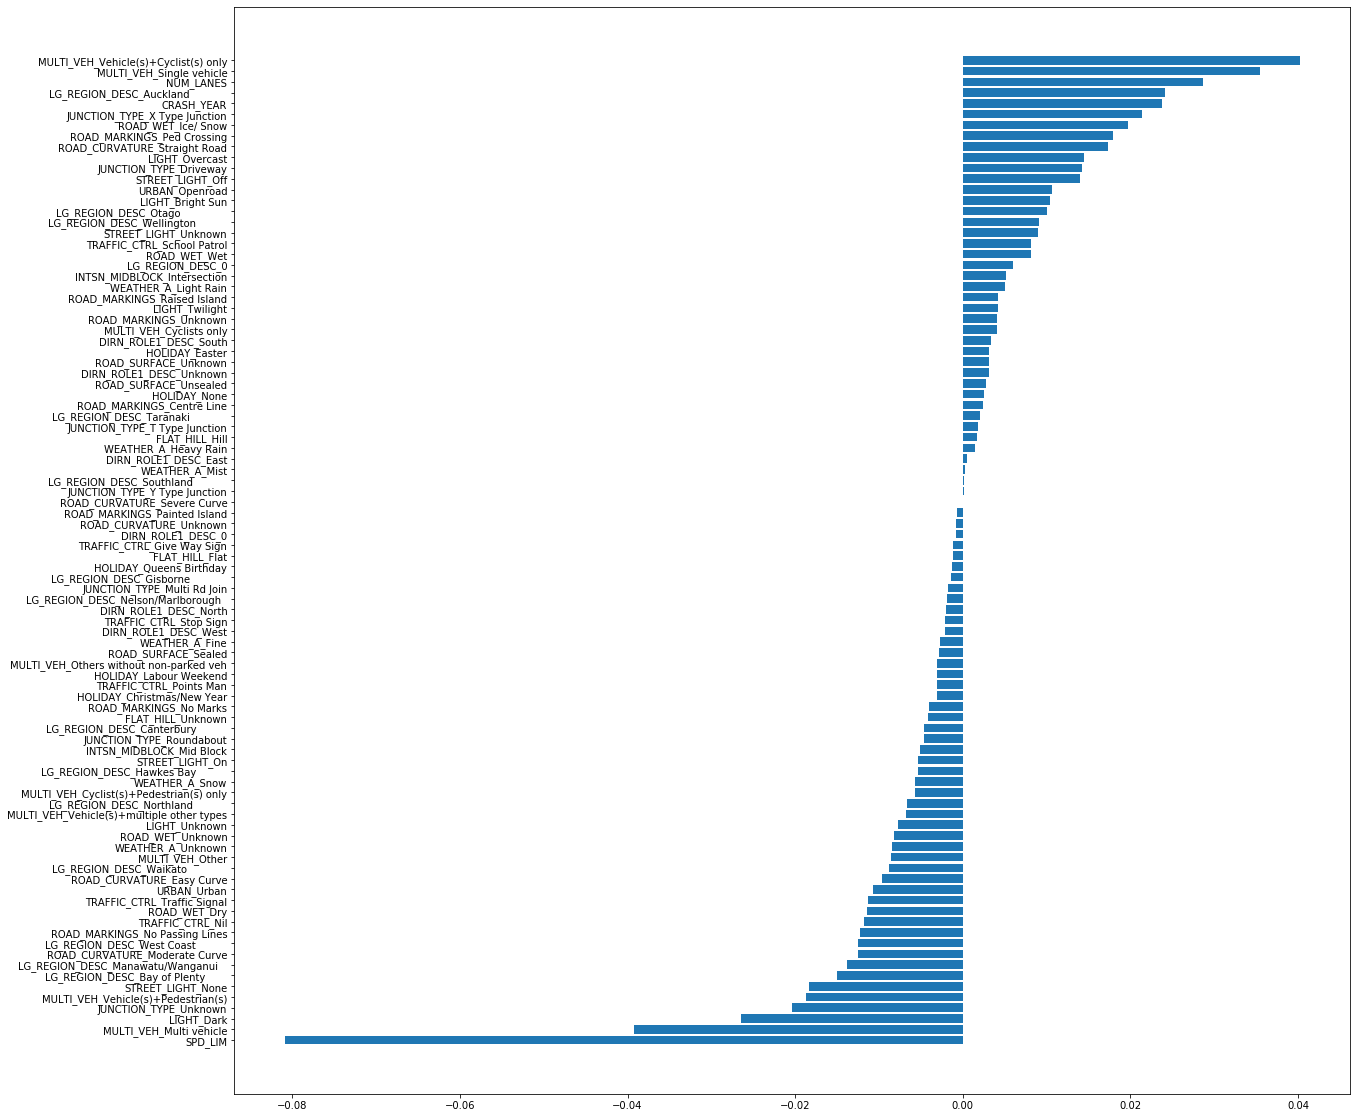

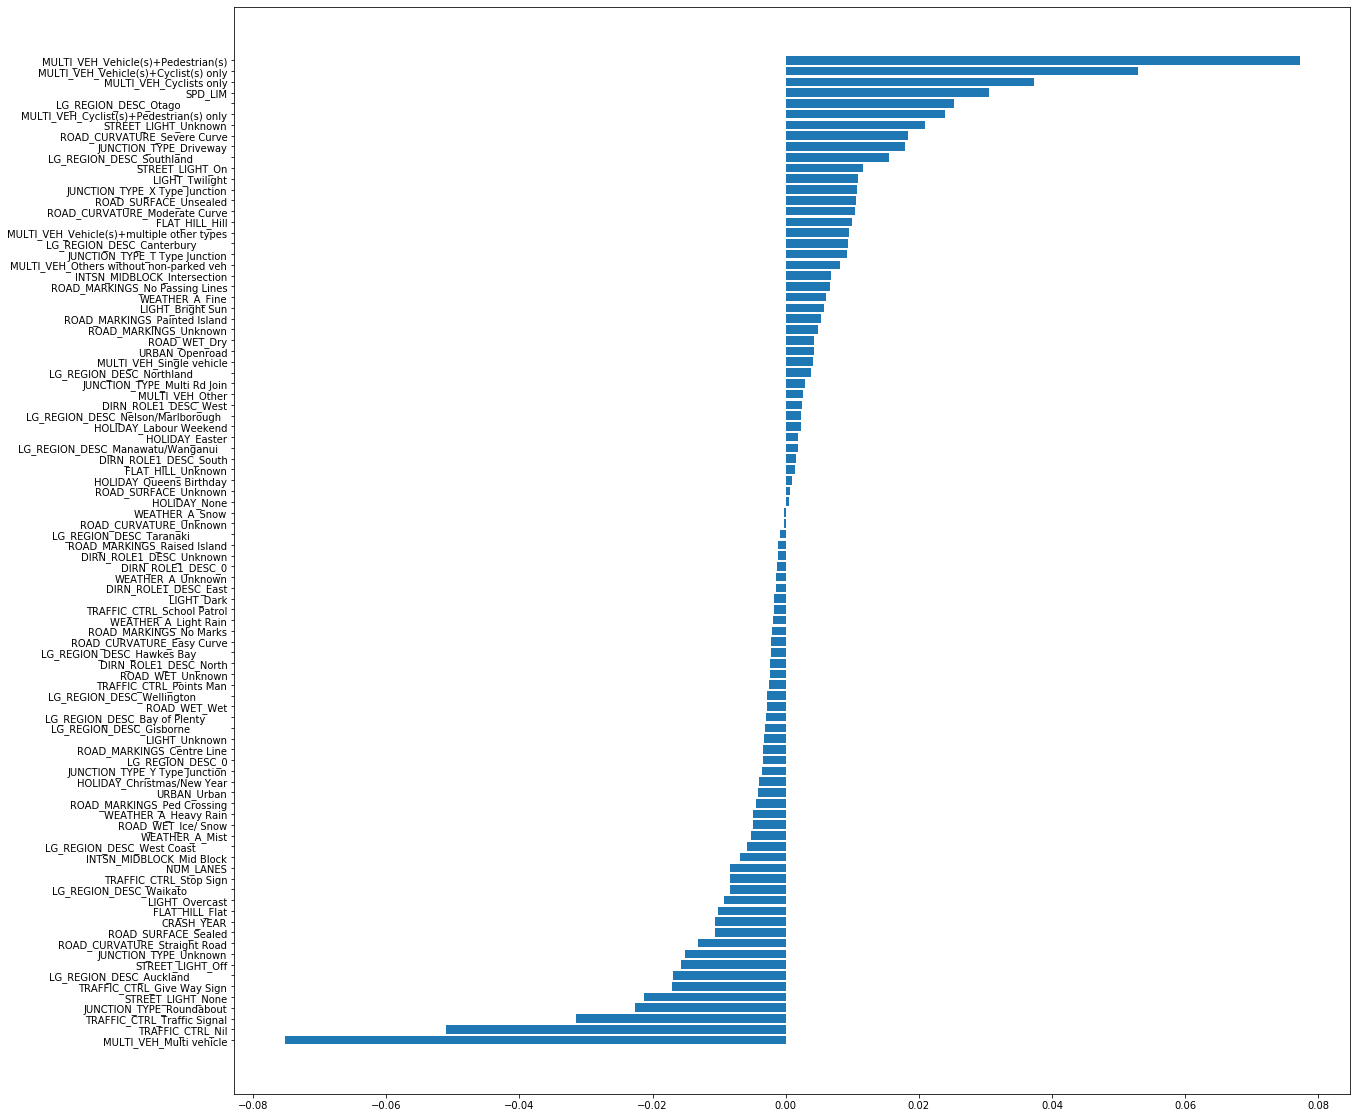

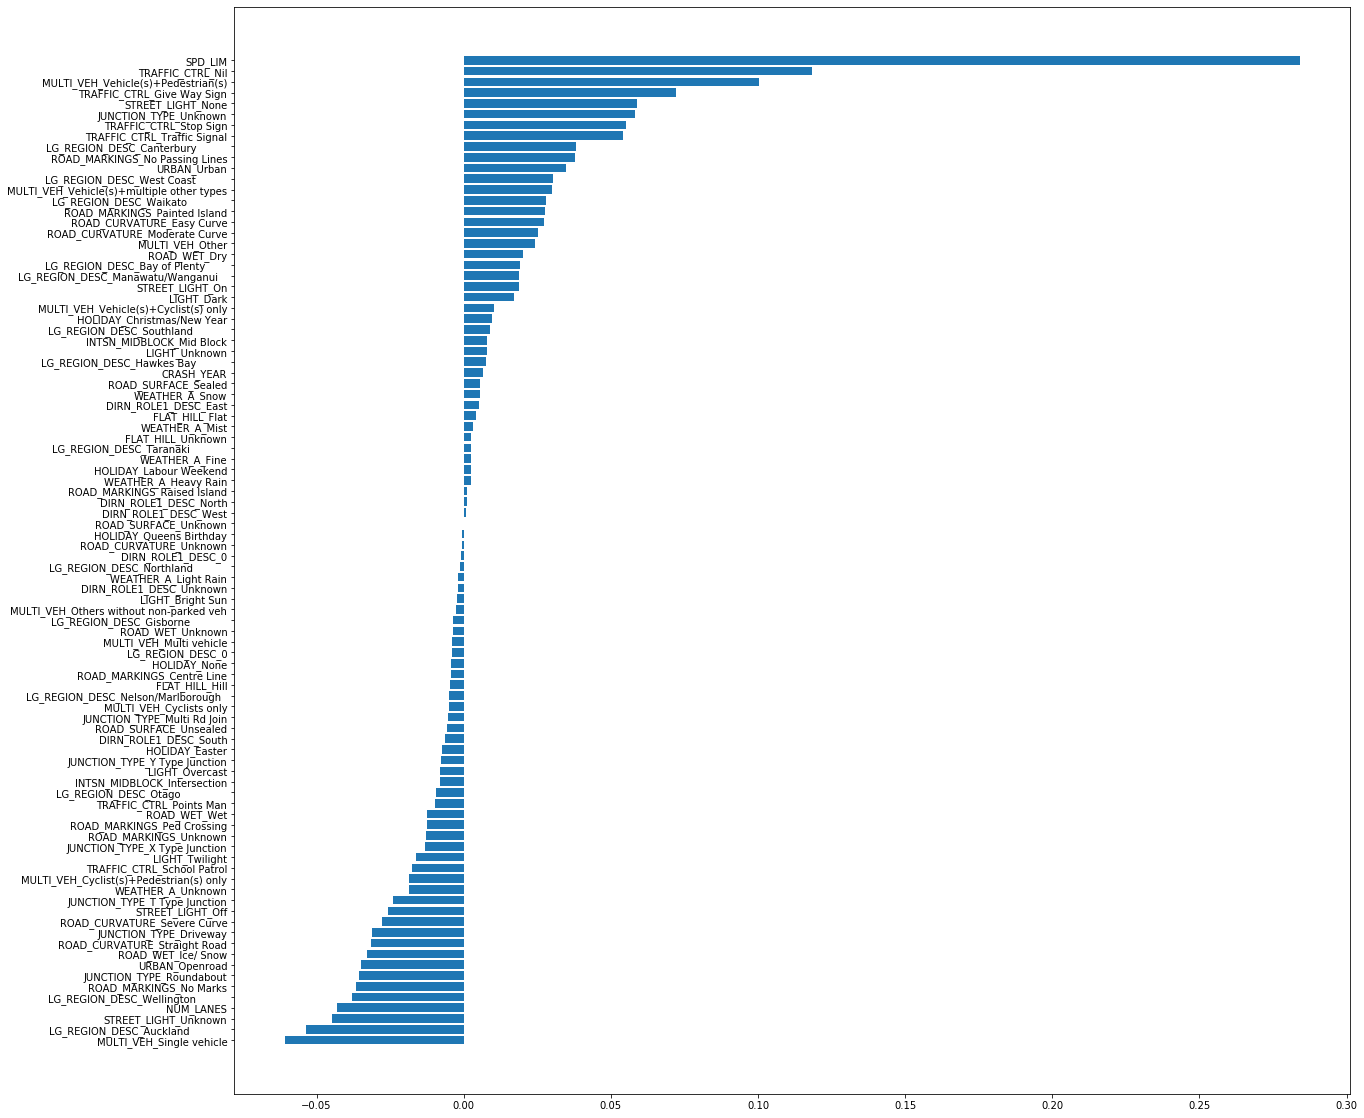

In [7]:
# in order of "non-injury", "minor", "serious", "fatal"
f_importances(clf.coef_[2], df_upsampled.columns.values)
f_importances(clf.coef_[1], df_upsampled.columns.values)
f_importances(clf.coef_[3], df_upsampled.columns.values)
f_importances(clf.coef_[0], df_upsampled.columns.values)